# Table of Contents
 <p><div class="lev1"><a href="#Multi-index"><span class="toc-item-num">1&nbsp;&nbsp;</span>Multi index</a></div>

In [1]:
from IPython.core.display import HTML

HTML('<style>{}</style>'.format('''
body {
    margin: 0;
    font-family: Helvetica;
}
table.dataframe {
    border-collapse: collapse;
    border: none;
}
table.dataframe tr {
    border: none;
}
table.dataframe td, table.dataframe th {
    margin: 0;
    border: 1px solid white;
    padding-left: 0.25em;
    padding-right: 0.25em;
}
table.dataframe th:not(:empty) {
    background-color: #fec;
    text-align: left;
    font-weight: normal;
}
table.dataframe tr:nth-child(2) th:empty {
    border-left: none;
    border-right: 1px dashed #888;
}
table.dataframe td {
    border: 2px solid #ccf;
    background-color: #f4f4ff;
}'''))


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import matplotlib
matplotlib.style.use('ggplot')

In [4]:
import pandas as pd

import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO
    
df = pd.read_csv(StringIO('''
    col1;col2;col3;col4
    1;4.4;99;A
    2;4.5;200;B
    3;4.7;65;C
    4;3.2;140;D
'''),
delimiter=';'
# delim_whitespace=True
)
df

,col1,col2,col3,col4
0,1,4.4,99,A
1,2,4.5,200,B
2,3,4.7,65,C
3,4,3.2,140,D


In [5]:
pd.read_csv(StringIO('''
col1 col2 col3 col4
   1  4.4   99    A
   2  4.5  200    B
   3  4.7   65    C
   4  3.2  140    D
'''),
delim_whitespace=True)

,col1,col2,col3,col4
0,1,4.4,99,A
1,2,4.5,200,B
2,3,4.7,65,C
3,4,3.2,140,D


In [6]:
df.set_index('col4', inplace=True)

In [7]:
df.index.name = 'UID'

In [8]:
df

,col1,col2,col3
UID,,,
A,1,4.4,99
B,2,4.5,200
C,3,4.7,65
D,4,3.2,140


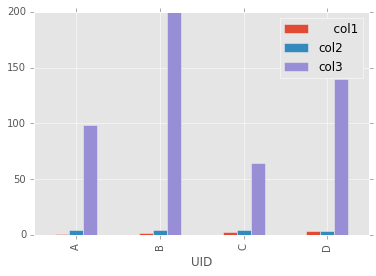

In [9]:
df.plot(kind='bar')

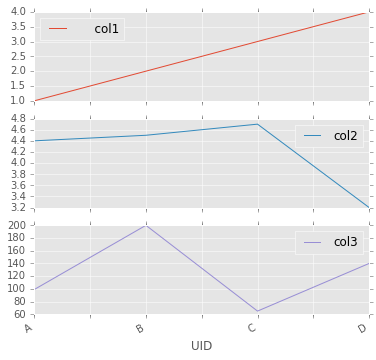

In [10]:
df.plot(subplots=True, figsize=(6, 6));

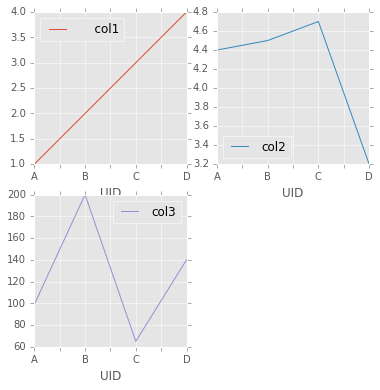

In [11]:
df.plot(subplots=True, layout=(2, -1), figsize=(6, 6), sharex=False);

# Multi index

In [12]:
df = pd.read_csv(StringIO('''\
from, to, dep, freq, arr, code, mode
RGBOXFD,RGBPADTON,127,0,27,99999,2
RGBOXFD,RGBPADTON,127,0,33,99999,2
RGBOXFD,RGBRDLEY,127,0,1425,99999,2
RGBOXFD,RGBCHOLSEY,127,0,52,99999,2
RGBOXFD,RGBMDNHEAD,127,0,91,99999,2
RGBDIDCOTP,RGBPADTON,127,0,46,99999,2
RGBDIDCOTP,RGBPADTON,127,0,3,99999,2
RGBDIDCOTP,RGBCHOLSEY,127,0,61,99999,2
RGBDIDCOTP,RGBRDLEY,127,0,1430,99999,2
RGBDIDCOTP,RGBPADTON,127,0,115,99999,2
'''), index_col=[0, 1], skipinitialspace=True)

In [13]:
df

dep  freq   arr   code  mode
from       to                                      
RGBOXFD    RGBPADTON   127     0    27  99999     2
           RGBPADTON   127     0    33  99999     2
           RGBRDLEY    127     0  1425  99999     2
           RGBCHOLSEY  127     0    52  99999     2
           RGBMDNHEAD  127     0    91  99999     2
RGBDIDCOTP RGBPADTON   127     0    46  99999     2
           RGBPADTON   127     0     3  99999     2
           RGBCHOLSEY  127     0    61  99999     2
           RGBRDLEY    127     0  1430  99999     2
           RGBPADTON   127     0   115  99999     2

In [14]:
df = pd.read_csv(StringIO('''
Male, Male, Male, Female
R, R, L, R
.86, .67, .88, .78, .81
'''), header=[0, 1])
df

Male  Male        Female
         R     R     L       R
0.86  0.67  0.88  0.78    0.81

In [15]:
df = pd.read_csv(StringIO('''
C0,,C_l0_g0,C_l0_g1,C_l0_g2
C1,,C_l1_g0,C_l1_g1,C_l1_g2
C2,,C_l2_g0,C_l2_g1,C_l2_g2
C3,,C_l3_g0,C_l3_g1,C_l3_g2
R0,R1,,,
R_l0_g0,R_l1_g0,R0C0,R0C1,R0C2
R_l0_g1,R_l1_g1,R1C0,R1C1,R1C2
R_l0_g2,R_l1_g2,R2C0,R2C1,R2C2
R_l0_g3,R_l1_g3,R3C0,R3C1,R3C2
R_l0_g4,R_l1_g4,R4C0,R4C1,R4C2
'''), header=[0,1,2,3], index_col=[0,1], skipinitialspace=True)
df

,C0,C_l0_g0,C_l0_g1,C_l0_g2
,C1,C_l1_g0,C_l1_g1,C_l1_g2
,C2,C_l2_g0,C_l2_g1,C_l2_g2
,C3,C_l3_g0,C_l3_g1,C_l3_g2
R0,R1,,,
R_l0_g0,R_l1_g0,R0C0,R0C1,R0C2
R_l0_g1,R_l1_g1,R1C0,R1C1,R1C2
R_l0_g2,R_l1_g2,R2C0,R2C1,R2C2
R_l0_g3,R_l1_g3,R3C0,R3C1,R3C2
R_l0_g4,R_l1_g4,R4C0,R4C1,R4C2
